## <center> Q&A Activity Week - 9

#### Q.1) Load the data into the pandas environment and identify some basic details of the dataset

#### 1.1) Loading the data set to pandas environment

In [1]:
import pandas as pd
emp_data = pd.read_csv('employee.csv')

#### 1.2) Basic details of the dataset

In [2]:
emp_data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [3]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


The given dataset have 9 rows and 7 columns.

Columns are named as name, age, income, gender, department, grade and performance_score.

Dataset have 6 null values with three each in age, income and gender columns.

In [4]:
emp_data.columns

Index(['name', 'age', 'income', 'gender', 'department', 'grade',
       'performance_score'],
      dtype='object')

#### Q.2) Reset the index as "name"

In [5]:
emp_data.set_index('name',inplace=True)

In [6]:
emp_data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


#### Q.3) Select rows for specific names Jack Morgan and Josh wills

In [7]:
emp_data.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


#### Q.4) Select data for multiple values "Sales" and “Finance”

In [8]:
emp_data[emp_data['department'].isin(['Sales','Finance'])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


#### Q.5) Display employee who has more than 700 performance score

In [9]:
emp_data[emp_data['performance_score'] > 700]      

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [10]:
# This code can be used to display the employee names(which is set as index) who has more than 700 performance score
emp_data.index[emp_data['performance_score']>700].tolist()

['Allen Smith', 'Dheeraj Patel', 'Josh Wills', 'Leo Duck']

#### Q.6) Display employee who has more than 500 and less than 700 performance score

In [11]:
emp_data[emp_data['performance_score'].between(500, 700,inclusive = 'neither')]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


In [12]:
# This code can be used to display the employee names(which is set as index as per Q.2) who has more than 700 performance score
emp_data.index[emp_data['performance_score'].between(500, 700,inclusive = 'neither')].tolist()

['S Kumar', 'Jack Morgan', 'Ying Chin', 'Satyam Sharma']

#### Q.7) Check and handle missing values in the dataset

#### 7.1 checking for null value

In [13]:
emp_data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [15]:
# showing rows with null values
emp_data[emp_data.isnull().any(axis=1)]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53


Plotting age and income using box plot to decide whether mean or median is more suitable for replacing the missing values.

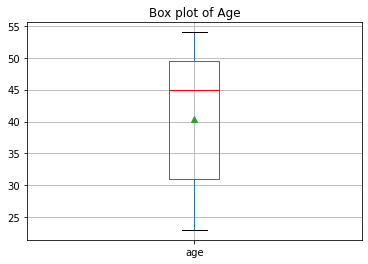

In [16]:
# triangle shows the mean and red line shows the median
import matplotlib.pyplot as plt
plt.title('Box plot of Age')
medianprops = dict(color="red",linewidth=1)
emp_data.boxplot(column='age', return_type='axes',showmeans=True,medianprops=medianprops)
plt.show()

 Age data is left skewed and to reduce effect of lowest age(age:23) median is more suitable

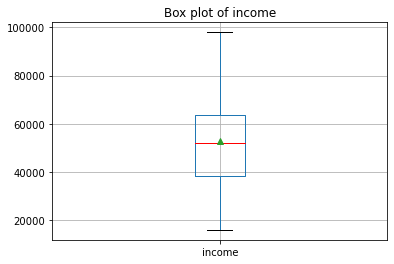

In [17]:
plt.title('Box plot of income')
medianprops = dict(color="red",linewidth=1)
emp_data.boxplot(column='income', return_type='axes',showmeans=True,medianprops=medianprops)
plt.show()

Mean or  Median can be used for filling missing values of income column
To increase coding efficiency median is used ,so that it can be used in a loop with age

In [18]:
for i in  ['age', 'income']: 
    emp_data[i]=emp_data[i].fillna(emp_data[i].median())

In [19]:
# using mode to fill the mssing values in gender column
emp_data['gender']=emp_data['gender'].fillna(emp_data['gender'].mode()[0])

In [20]:
# Displaying the dataset after filling the mssing values.
emp_data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


#### Q.8) Check the outliers and handle outliers in performance score using Percentiles

In [21]:
# to check outliers, plotting box plot of performance score.

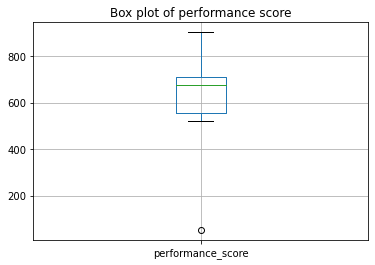

In [22]:
emp_data.boxplot(column='performance_score',return_type='axes')
plt.title('Box plot of performance score')
plt.show()

There is one outlier and which is on the lesser side of the performance score.

In [23]:
# Finding the outlier using percentiles
import numpy as np
Q1=np.percentile(emp_data['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(emp_data['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(emp_data['performance_score'],75,interpolation='midpoint')
print("Quartiles are:",Q1,Q2,Q3)

Quartiles are: 556.0 674.0 711.0


In [24]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
Up_limit=Q3+1.5*IQR
print("Lower limit and upper limit are ",low_limit,',',Up_limit)

Lower limit and upper limit are  323.5 , 943.5


In [25]:
outlier=[]
for x in emp_data['performance_score']:
    if((x>Up_limit) or (x<low_limit)):
       outlier.append(x)
print('Outlier is',outlier)

Outlier is [53]


since the outlier seems to be an entry related error,needs to be corrected which involves fixing the typo, possibly going through the collected raw data.When this particular outlier is removed, number of data changes, thus its quantile changes lower range and upper range changes,results in again showing outliers.So the first option to correct the data definitely presides over other options.Filling the outlier with median and mean also results in increasing the outliers to 2.
If outlier needs to be manipulated,clipping is the best option.

In [26]:
#Using clipping technique to remove outliers

Values that are less than the value at 8th percentile are replaced by the value at 8th percentile, and values that are greater than the value at 92nd percentile are replaced by the value at 92nd percentile.

In [27]:
q_l = emp_data['performance_score'].quantile(0.08)
q_h = emp_data['performance_score'].quantile(0.92)
emp_data.loc[emp_data['performance_score']<= q_l, 'performance_score'] = q_l
emp_data.loc[emp_data['performance_score']>= q_h, 'performance_score'] = q_h
emp_data['performance_score'] = emp_data['performance_score'].clip(lower = q_l, upper = q_h).astype(int)
emp_data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,351
Josh Wills,54.0,52000.0,F,Finance,G3,787
Leo Duck,23.0,98000.0,M,Sales,G4,709


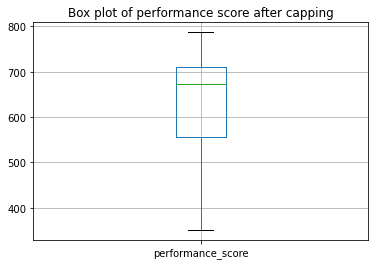

In [28]:
emp_data.boxplot(column='performance_score',return_type='axes')
plt.title('Box plot of performance score after capping')
plt.show()

#### Q.9) Check the gender column and do Dummy encoding

In [29]:
emp_data.gender

name
Allen Smith      F
S Kumar          F
Jack Morgan      M
Ying Chin        F
Dheeraj Patel    F
Satyam Sharma    F
James Authur     F
Josh Wills       F
Leo Duck         M
Name: gender, dtype: object

In [30]:
#After dummy encoding 1 new column will be created where as after one hot encoding 2 new columns will be created 
#for one hot encoding,no need to make drop_first='True'.By default its one hot encoding. 
emp_data=pd.get_dummies(emp_data,columns=['gender'],drop_first='True') 
emp_data

,age,income,department,grade,performance_score,gender_M
name,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,723,0
S Kumar,45.0,16000.0,Finance,G0,520,0
Jack Morgan,32.0,35000.0,Finance,G2,674,1
Ying Chin,45.0,65000.0,Sales,G3,556,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,0
Satyam Sharma,45.0,62000.0,Sales,G3,649,0
James Authur,54.0,52000.0,Operations,G3,351,0
Josh Wills,54.0,52000.0,Finance,G3,787,0
Leo Duck,23.0,98000.0,Sales,G4,709,1


#### Q.10) Do the standard scaling on the feature performance score

In [31]:
# Peformance score column before standard scaling
emp_data['performance_score']

name
Allen Smith      723
S Kumar          520
Jack Morgan      674
Ying Chin        556
Dheeraj Patel    711
Satyam Sharma    649
James Authur     351
Josh Wills       787
Leo Duck         709
Name: performance_score, dtype: int32

In [33]:
from sklearn import preprocessing
standardisation=preprocessing.StandardScaler()
emp_data[['ps_standardized']]=standardisation.fit_transform(emp_data[['performance_score']])
emp_data

,age,income,department,grade,performance_score,gender_M,ps_standardized
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,723,0,0.726943
S Kumar,45.0,16000.0,Finance,G0,520,0,-0.879012
Jack Morgan,32.0,35000.0,Finance,G2,674,1,0.339299
Ying Chin,45.0,65000.0,Sales,G3,556,0,-0.594212
Dheeraj Patel,30.0,42000.0,Operations,G2,711,0,0.632010
Satyam Sharma,45.0,62000.0,Sales,G3,649,0,0.141521
James Authur,54.0,52000.0,Operations,G3,351,0,-2.215990
Josh Wills,54.0,52000.0,Finance,G3,787,0,1.233254
Leo Duck,23.0,98000.0,Sales,G4,709,1,0.616188
